In [55]:
#   Dependencies
#   Wrapper to get cities from random cordiantes

from citipy import citipy

#       For api Keys- Probably don't need g_key
from api_keys import (weather_api_key)

#    needed for rounding and integer manipulation
import numpy as np

#    needed for dataframes
import pandas as pd

#    Needed to get data
import requests

#    Need for slowing down the query loop and date stamps
import time

#    Needed for linear regresion
from scipy.stats import linregress
#do I need both?????
import scipy.stats as st

#needed for ploting. Notsure both are needed
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# needed for viewing data pulled
import json
# needed to generate randoom numbers
import random

In [2]:
###############         time stamp
### used to date incoming data

#ts = datetime.datetime.now().timestamp()
#ts
#time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime(epoch))

epoch = (time.time())
#time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(epoch))
time_stamp = time.strftime("%d %b %Y %H:%M:%S", time.localtime(epoch))
time_stamp

'20 Oct 2020 12:23:44'

# Getting The DATA

In [3]:
#random country generator for dataframe

# Set variable for numbe of cities

# a miniumn of 10 values must be selected to get regression data.
###############################
###############################
total_count = int(1200)      ##
                            ###
##############################

#generates Data frame
city_pd = pd.DataFrame(columns =["CITY","Country Code", "Latitude", "Longitude"])

# Populates dataframe with countires
for ctn in range(total_count):
    rng = np.random.default_rng()
    ran_lat = np.round(float(random.random()) * rng.integers(-89,89, size=1),6)
    ran_lon = np.round(float(random.random()) * rng.integers(-180,180, size=1),6)
    city = citipy.nearest_city(ran_lat, ran_lon)
    city_name = city.city_name.title()
    city_count_code = city.country_code.upper()
    
    city_pd.loc[ctn, "CITY"] = city_name
    city_pd.loc[ctn, "Country Code"] = city_count_code
    city_pd.loc[ctn, "Latitude"] = ran_lat
    city_pd.loc[ctn, "Longitude"] = ran_lon


#city_pd.drop_duplicates(subset = ["CITY", "Country Code"])
#city_pd  

In [4]:
# Generates metrics to determin count and unique count from wrapper
unique_count = len(pd.unique(city_pd['CITY']))
total_count = len(city_pd["CITY"])

perc_uni = unique_count/total_count *100

print(f"Total Count:{total_count}   Unique count = {unique_count}")
print(f"Percentage of unique countries = {perc_uni}%")

Total Count:1200   Unique count = 647
Percentage of unique countries = 53.91666666666667%


In [5]:
#Gets rid of dubplicate cities
city_pd = city_pd.drop_duplicates(subset="CITY", keep="first", inplace=False)



In [6]:
# Used to bechmark the removal of dubplicates with preivous code
unique_count = len(pd.unique(city_pd['CITY']))
total_count = len(city_pd["CITY"])
print(f"Total Count:{total_count}   Unique count = {unique_count}")
total_count


Total Count:647   Unique count = 647


647

In [7]:
# Sets up list of random cities for query loop
# Also used to evalue the list for problem solving.
# the list format or data input is a suspect for why the code does not work
 
city_list = city_pd["CITY"].values.tolist()
Country_list = city_pd["Country Code"].values.tolist()

#             USED FOR TESTING
########## city list is pushed forward
#city_list 
##city_name
#Country_list

In [8]:
# Search bassed on City and Country Code

# URL bassed Base
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query with no city this works with the loop 
no_ciy_code_query_url = url + "appid=" + weather_api_key + "&q="

#no_ciy_code_query_url

In [9]:
city_list = sorted(city_list)

In [10]:
####################################
#    workhorse of the code
###  creates lists to store data
#    makes api call 
##   populates lists with data

# set up lists to hold reponse info
city_id = []

lat_list = []
lon_list = []

temp = []
humid = []
cloud =[]
wind_kn = []

name_conf = []
country_conf = []
time_stamp3 = []

# Loop through the list of cities and perform a request for data on each
for city in city_list:
    try:   
        response = requests.get(no_ciy_code_query_url + city).json()
        # response above works

        city_id.append(response['id'])

        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])

        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])

        cloud.append(response['clouds']['all'])
        wind_kn.append(response['wind']['speed'])
        
      
        time_stamp3.append([time_stamp])
        
        
    # confirm name and state    
        name_conf.append(response['name'])
        country_conf.append(response['sys']['country'])
        time.sleep(1.1)
    
    except: 
        print(f"City not found {city}")
        pass 

    
# Purpose of print statements was to find mismatched data aray error

#print(f"\n\nThe city id information received is: {len(city_id)}")
#print(f"The latitude information received is: {len(lat_list)}")
#print(f"The Longatude information received is: {len(lon_list)}")
#print(f"The temperature information received is: {len(temp)}\n")


#print(f"total number of humid evaluated: {len(humid)} ")
#print(f"total number of %cloud evaluated: {len(cloud)} ")
#print(f"total number of wind evaluated: {len(wind_kn)} ")
#print(f"total number of time stamps evaluated: {len(time_stamp3)}\n")

#print(f"total number of name_conf evaluated: {len(name_conf)} ")
#print(f"total number of country_conf evaluated: {len(country_conf)} ")
#print(f"total number of city_list input evaluated: {len(city_list)} ")
#print(f"total number of Country_list input evaluated: {len(Country_list)} ")


#---------------------------------------------------------
print(f"\n\ntotal number of Cities evalluated input evaluated: {len(city_list)}")
print(f"Retrieved number of cities from web service: {len(name_conf)} ")

RET =len(name_conf)
START = len(city_list)
found_perc = round((RET/START)*100)
      
print(f"Percentage found: {found_perc}% ")     

# wish list filter on countires as well Does not dot that at the moment.

City not found Amderma
City not found Armacao Dos Buzios
City not found Bababe
City not found Barawe
City not found Barentsburg
City not found Belushya Guba
City not found Bokspits
City not found Burica
City not found Cam Pha
City not found Dzhusaly
City not found El Wasta
City not found Galgani
City not found Gilgil
City not found Grand River South East
City not found Himora
City not found Ijaki
City not found Illoqqortoormiut
City not found Jiddah
City not found Jujuy
City not found Kalimnos
City not found Khormuj
City not found Longlac
City not found Mahadday Weyne
City not found Mahaicony
City not found Malwan
City not found Marcona
City not found Matsanga
City not found Miranorte
City not found Nguiu
City not found Odemis
City not found Okandja
City not found Opobo
City not found Palabuhanratu
City not found Sahrak
City not found Subaytilah
City not found Tabarqah
City not found Taolanaro
City not found Tarudant
City not found Tasbuget
City not found Tubruq
City not found Tuggurt


In [56]:
 # create a data frame from cities, lat, and temp from list

    
# Some math converisons    
temp_f = np.round(np.array(temp) *1.8 -459.67)
temp_c = np.round((np.array(temp_f) - 32) / 1.8)
wind_mph = np.round((np.array(wind_kn) / 0.45), 2)

# Taken out of dictionary due to mismatch of aray length
#"City": city_list,
#"Country Code" : Country_list,

weather_dict = {
    "City ID" : city_id,
    
    "City" : name_conf,
    
    #"Country Code" : Country_list,
    "Country Code" : country_conf,
    
    "Latitude" : lat_list,
    "Longitude" : lon_list,
    
    "Temp Kelvin": temp,
    "Temp C" : temp_c,
    "Temp F" : temp_f,
    
    "Humidity (RH)%" : humid,
    "Cloud% Cover" : cloud
    ,
    "wind speed (m/s)" : wind_kn,
    "wind speed (mph)" : wind_mph,
    
    "Time stamp" : time_stamp3
}

weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

,City ID,City,Country Code,Latitude,Longitude,Temp Kelvin,Temp C,Temp F,Humidity (RH)%,Cloud% Cover,wind speed (m/s),wind speed (mph),Time stamp
0,2353099,Abakaliki,NG,6.32,8.12,303.18,30.0,86.0,73,48,1.65,3.67,[20 Oct 2020 12:23:44]
1,110690,Abhā,SA,18.22,42.51,293.15,20.0,68.0,10,1,5.10,11.33,[20 Oct 2020 12:23:44]
2,2324433,Abonnema,NG,4.71,6.79,301.15,28.0,82.0,78,75,2.60,5.78,[20 Oct 2020 12:23:44]
3,172515,Abu Samrah,SY,35.30,37.18,297.13,24.0,75.0,28,0,3.90,8.67,[20 Oct 2020 12:23:44]
4,3408368,Acaraú,BR,-2.89,-40.12,304.66,32.0,89.0,51,49,10.20,22.67,[20 Oct 2020 12:23:44]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2220853,Yokadouma,CM,3.52,15.05,296.35,23.0,74.0,84,23,0.59,1.31,[20 Oct 2020 12:23:44]
598,6355222,Yulara,AU,-25.24,130.99,295.15,22.0,72.0,56,0,3.60,8.00,[20 Oct 2020 12:23:44]
599,2317982,Yuli,NG,9.70,10.27,301.90,29.0,84.0,47,40,1.67,3.71,[20 Oct 2020 12:23:44]
600,464790,Zapolyarnyy,RU,69.42,30.81,274.15,1.0,34.0,98,90,5.10,11.33,[20 Oct 2020 12:23:44]


In [57]:
# Confirm cites are unique. Program will vary on location if two cities exist in diffrent countires.
# This does not impact randmo list but does diverge in data from original city list. May fix if timme. Should no
# be a problem
# working list to compare. Needed to refrecne longitude and latitude. Confirm name and country replaces this now.
# is nice to refrence descrepancies in lon and lat.
#city_pd  

## Saves data to csv file is: big_weather_data_df

In [58]:
# Save Data to csv sends paralel to file
              #works    
#weather_data_df.to_csv("weather_data_df.csv")
#works puts iti n output folder
#weather_data_df.to_csv("../output_data/g_20_weather_data_df.csv")
weather_data_df.to_csv("output_2/big_weather_data_df.csv")

# GRAPHS 
# Scatter plots for entire cities being evaluated
        Temperature (F) vs. Latitude
        Humidity (%) vs. Latitude
        Cloudiness (%) vs. Latitude
        Wind Speed (mph) vs. Latitude

###   Temperature (F) vs. Latitude
       Data set includes all cities

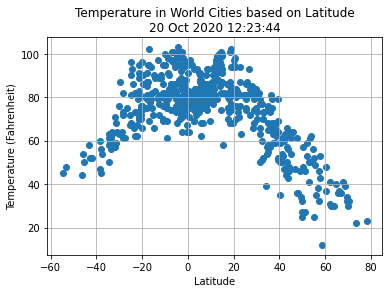

In [59]:
# scatter plot for Temprature in world cities based on Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temp F"], marker="o")

# Incorporate the other graph properties
plt.title(f"Temperature in World Cities based on Latitude\n{time_stamp}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Save the figure
plt.savefig("output_2/1_Temperature in World Cities based on Latitude.png")

# Show plot
plt.show()

###    Humidity (%) vs. Latitude
       Data includes all cities

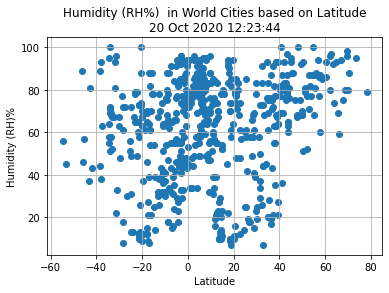

In [60]:
# scatter plot for Humidity in world cities based on Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity (RH)%"], marker="o")

# Incorporate the other graph properties
plt.title(f"Humidity (RH%)  in World Cities based on Latitude\n{time_stamp}")
plt.ylabel("Humidity (RH)%")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_2/2_Humidity (RH%)  in World Cities based on Latitude.png")

# Show plot
plt.show()

###  Wind speed (mph) vs. Latitude
     Data includes all cities

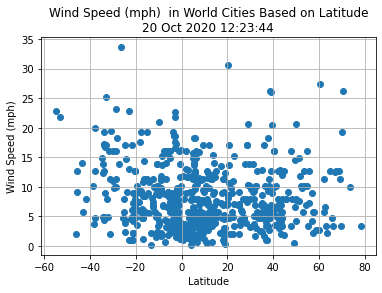

In [61]:
# scatter plot for wind speed in world cities based on Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["wind speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title(f"Wind Speed (mph)  in World Cities Based on Latitude\n{time_stamp}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_2/3_Wind Speed  in World Cities based on Latitude")

# Show plot
plt.show()

###    Cloudiness (%) (mph) vs. Latitude
       Data includes all cities

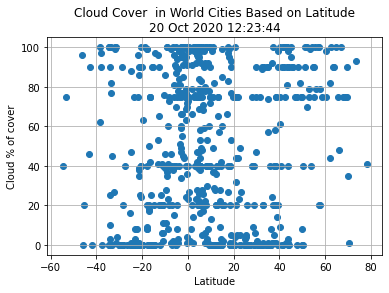

In [62]:
# scatter plot for Humidity in world cities based on Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloud% Cover" ], marker="o")

# Incorporate the other graph properties
plt.title(f"Cloud Cover  in World Cities Based on Latitude\n{time_stamp}")
plt.ylabel("Cloud % of cover" )
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_2/4_Cloud_cover_Latitude.png")

# Show plot
plt.show()

#             Sorts Northern Hemispher From Souther Hemisphere Data

In [63]:
#Gets a refrence count for checking Norhtern cities vrs southern

# Generates metrics to determin count and unique count from wrapper
unique_count = len(pd.unique(weather_data_df["City ID"]))
total_count = len(weather_data_df["City ID"])
print(f"Total Count:{total_count}   Unique count = {unique_count}")

Total Count:602   Unique count = 600


Sorts data into two dataframes North and South

In [64]:
# Norther Hemispher countries (greater than or equal to 0 degrees latitude)
nh = weather_data_df["Latitude"] > 0
north_hem_df = weather_data_df[nh]
#north_hem_df

In [65]:
# Generates metrics to determin count and unique for Norhtern hemisphere
unique_count = len(pd.unique(north_hem_df["City ID"]))
total_count = len(north_hem_df["City ID"])
print(f"Total Count:{total_count}   Unique count = {unique_count}")

Total Count:369   Unique count = 368


In [66]:
# Southern Hemisphere countries (less than or equal to 0 degrees latitude)
# a corection factor was incorperated to account for negative latitude

sh = weather_data_df["Latitude"] < -1

south_hem_raw_df = weather_data_df[sh].copy()
south_hem_df = south_hem_raw_df

# convert negative latitude to positvie so plots are equivlent
south_hem_df["Latitude"] = south_hem_df.loc[:,"Latitude"] * -1
#south_hem_df

In [67]:
# Generates metrics to determin count and unique count for Southern hemisphere
unique_count = len(pd.unique(south_hem_df["City ID"]))
total_count = len(south_hem_df["City ID"])
print(f"Total Count:{total_count}   Unique count = {unique_count}")

Total Count:215   Unique count = 215


# Graphs related to Northern Hemisphere vrs Southern

## Dirrect comparison of Temp vrs Latitude for North and South

Experiment with combining data for evaluation. Most compeling graph to answer argument

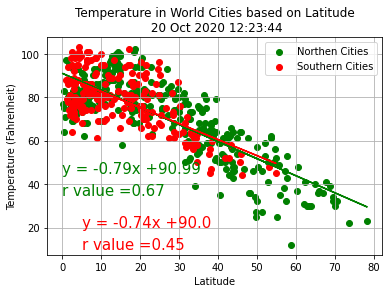

In [68]:
#Single plot of  both Nothern Tempratures and southern
# scatter plot for Temprature in Nothern world cities based on Latitude (Blue)

#                Perfrom regresion anaylyis
#                Update x y cordinates
#                change color of line
x_North = north_hem_df["Latitude"]
y_North = north_hem_df["Temp F"]

plt.scatter(x_North, y_North, marker="o", color= 'green', label="Northen Cities")


#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(n_slope, n_intercept, n_rvalue, n_pvalue, n_stderr) = st.linregress(x_North, y_North)


  # Get regression values
North_regress_values = x_North * n_slope + n_intercept
plt.plot(x_North, North_regress_values,"g")
# Create line equation string
nline_eq = "y = " + str(round(n_slope,2)) + "x +" + str(round(n_intercept,2))

n_rv2 = round(n_rvalue**2,2)
n_r_value = "r value =" + str(n_rv2)

plt.annotate(nline_eq ,(0,45),fontsize=15,color="green")
plt.annotate(n_r_value,(0,35),fontsize=15,color="green")

##-----------------------------------------------------------------------------
# scatter plot for Temprature in Southern world cities based on Latitude (Red)

x_south = south_hem_df["Latitude"]
y_south = south_hem_df["Temp F"]


plt.scatter(x_south, y_south, marker="o", color= 'red', label="Southern Cities")
#plt.plot(xN,regress_values,"r-")

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(s_slope, s_intercept, s_rvalue, s_pvalue, s_stderr) = st.linregress(x_south, y_south)

  # Get regression values
s_regress_values = x_south * s_slope + s_intercept

plt.plot(x_south, s_regress_values,"r")

# Create line equation string
sline_eq = "y = " + str(round(s_slope,2)) + "x +" + str(round(s_intercept,2))

s_rv2 = round(s_rvalue**2,2)
s_r_value = "r value =" + str(s_rv2)

plt.annotate(sline_eq ,(5,20), fontsize=15,color="red")
plt.annotate(s_r_value,(5,10), fontsize=15,color="red")

##-----------------------------------------------------------------------------

# Incorporate the other graph properties

plt.legend()
plt.title(f"Temperature in World Cities based on Latitude\n {time_stamp}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_2/1_Temperature in World Cities based on Latitude.png")

# Show plot
plt.show()

##    Comparison of Northern and Southern Hemispheres (Temprature vrs Latitude)

Temprature vrs Latitude North Hemispher
Northrn Hemispher y = -0.79x +90.99
Northern Hemispher r-value is: 0.6704360112945867


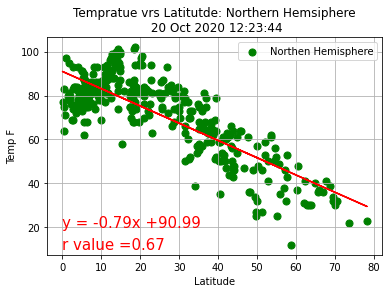

In [69]:
### Plot of tempratue vrs Latitude

###############################################
#Northern Hemisphsere

xN = north_hem_df["Latitude"]
yN = north_hem_df["Temp F"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Northen Hemisphere",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

rv2 = round(rvalue**2,2)
r_value = "r value =" + str(rv2)

  # Plots regresion line
plt.plot(xN,regress_values,"r-")

plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.annotate(r_value,(0,10),fontsize=15,color="red")

print("Temprature vrs Latitude North Hemispher")
print(f"Northrn Hemispher {line_eq}")
print(f"Northern Hemispher r-value is: {rvalue**2}")

#     THIS NEEDS some attention



#########   Formats graph
plt.title(f"Tempratue vrs Latitutde: Northern Hemsiphere\n {time_stamp}")
plt.xlabel("Latitude")
plt.ylabel("Temp F")
ax1.legend()
ax1.grid(True)


# Save the figure
plt.savefig("output_2/z_02_1a_Tempratue_vrs_Latitutde_Nor.png")

plt.show()

Temprature vrs Latitude North Hemispher
Southern Hemispher y = -0.74x +90.0
Southern Hemispher r-value is: 0.4503040242398553


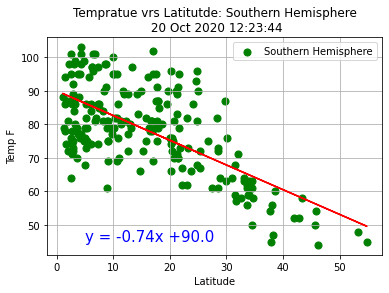

In [70]:
### Plot of tempratue vrs Latitude

###############################################
#Southern Hemisphsere Latitude was corrected for negaive values

xN = south_hem_df["Latitude"]
yN = south_hem_df["Temp F"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Southern Hemisphere",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plots regresion line
plt.plot(xN,regress_values,"r-")

print("Temprature vrs Latitude North Hemispher")
print(f"Southern Hemispher {line_eq}")
print(f"Southern Hemispher r-value is: {rvalue**2}")

#     plots line equation
plt.annotate(line_eq,(5,45),fontsize=15,color="blue")

rv2 = round(rvalue**2,2)
r_value = "r value =" + str(rv2)
plt.annotate(r_value,(5,40),fontsize=15,color="blue")

#########   Formats graph
plt.title(f"Tempratue vrs Latitutde: Southern Hemisphere\n {time_stamp}")
plt.xlabel("Latitude")
plt.ylabel("Temp F")
ax1.legend()
ax1.grid(True)

# Save the figure
plt.savefig("output_2/z_02_1b_Tempratue_vrs_Latitutde_Southern.png")
plt.show()

## Comparison of Northern vrs Southern Hemispheres: Humidity (RH%) vrs Latitude

Northern Humidity vrs Latitude
Northrn Hemispher y = 0.17x +61.45
Northern Hemispher r-value is: 0.016569810226414412


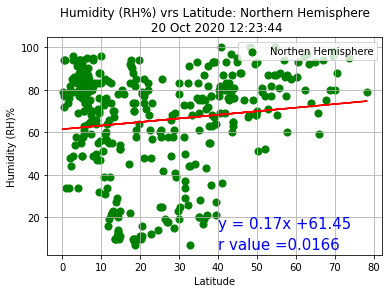

In [71]:
### Plot of Humidity vrs Latitude
###############################################
#Northern Hemisphsere

xN = north_hem_df["Latitude"]
yN = north_hem_df["Humidity (RH)%"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Northen Hemisphere",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

  # Plots regresion line
plt.plot(xN,regress_values,"r-")


print("Northern Humidity vrs Latitude")
print(f"Northrn Hemispher {line_eq}")
print(f"Northern Hemispher r-value is: {rvalue**2}")

#     THIS NEEDS some attention
plt.annotate(line_eq,(40,15),fontsize=15,color="blue")
rv2 = round(rvalue**2,4)
r_value = "r value =" + str(rv2)
plt.annotate(r_value,(40,5),fontsize=15,color="blue")

#########   Formats graph
plt.title(f"Humidity (RH%) vrs Latitude: Northern Hemisphere\n {time_stamp}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (RH)%")
ax1.legend(loc=1)
ax1.grid(True)

# Save the figure
plt.savefig("output_2/z_02_2a_Humidity_vrs_Latitude_Northern Hemisphere.png")
plt.show()

Southern Humidity vrs Latitude
Southern Hemispher y = 0.02x +55.36
Southern Hemispher r-value is: 7.874410932242282e-05


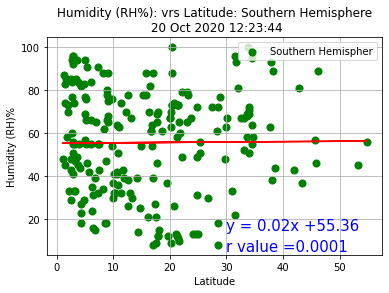

In [72]:
### Plot of Humidity vrs Latitude
###############################################
#Northern Hemisphsere
xN = south_hem_df["Latitude"]
yN = south_hem_df["Humidity (RH)%"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Southern Hemispher",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

  # Plots regresion line
plt.plot(xN,regress_values,"r-")

print("Southern Humidity vrs Latitude")
print(f"Southern Hemispher {line_eq}")
print(f"Southern Hemispher r-value is: {rvalue**2}")

#     THIS NEEDS some attention
plt.annotate(line_eq,(30,15),fontsize=15,color="blue")

rv2 = round(rvalue**2,4)
r_value = "r value =" + str(rv2)
plt.annotate(r_value,(30,5),fontsize=15,color="blue")

#########   Formats graph
plt.title(f"Humidity (RH%): vrs Latitude: Southern Hemisphere\n {time_stamp}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (RH)%")
ax1.legend(loc=1)
ax1.grid(True)

# Save the figure
plt.savefig("output_2/z_02_2b_Humidity_vrs_Latitude_So_Hemisphere.png")
plt.show()

## Comparison of Northern vrs Southern Hemispheres: Cloudiness (%) vs. Latitude

Northern Cloudiness (%) vrs Latitude
Northrn Hemisphere y = 0.21x +41.76
Northern Hemisphere r-value is: 0.01123656108924679


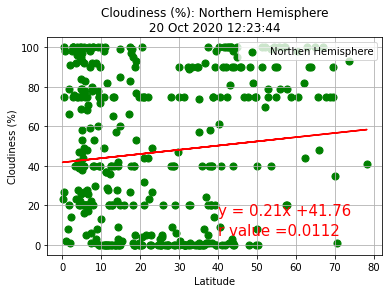

In [73]:
### Plot of Cloudiness (%) vs. Latitude
###############################################
#Northern Hemisphsere

xN = north_hem_df["Latitude"]
yN = north_hem_df["Cloud% Cover"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Northen Hemisphere",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

  # Plots regresion line
plt.plot(xN,regress_values,"r-")

print("Northern Cloudiness (%) vrs Latitude")
print(f"Northrn Hemisphere {line_eq}")
print(f"Northern Hemisphere r-value is: {rvalue**2}")

#     Plots equations and r values
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
rv2 = round(rvalue**2,4)
r_value = "r value =" + str(rv2)
plt.annotate(r_value,(40,5),fontsize=15,color="red")

#########   Formats graph
plt.title(f"Cloudiness (%): Northern Hemisphere\n {time_stamp} ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax1.legend(loc=1)
ax1.grid(True)

# Save the figure
plt.savefig("output_2/z_02_3a_Cloud_Northern_Hemisphere.png")

plt.show()

 Southern Cloudiness (%) vrs Latitude
Southern Hemispher y = -0.68x +58.38
Southern Hemispher r-value is: 0.047177842322716275


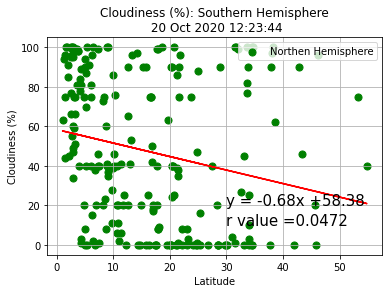

In [74]:
### Plot of Cloudiness (%) vs. Latitude
###############################################
#Southern Hemisphsere

xN = south_hem_df["Latitude"]
yN = south_hem_df["Cloud% Cover"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Northen Hemisphere",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

  # Plots regresion line
plt.plot(xN,regress_values,"r-")

print(" Southern Cloudiness (%) vrs Latitude")
print(f"Southern Hemispher {line_eq}")
print(f"Southern Hemispher r-value is: {rvalue**2}")

#     THIS NEEDS some attention
plt.annotate(line_eq,(30,20),fontsize=15,color="black")

r_value = "r value =" + str(round(rvalue**2,4))
plt.annotate(r_value,(30,10),fontsize=15,color="black")

#########   Formats graph
plt.title(f"Cloudiness (%): Southern Hemisphere\n {time_stamp}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax1.legend(loc=1)
ax1.grid(True)

# Save the figure
plt.savefig("output_2/z_02_3b_Cloudiness_Southern Hemisphere.png")


plt.show()

## Comparison of Northern vrs Southern Hemispheres: Wind Speed (mph) vs. Latitude

Northern Wind Speed (mph) vs. Latitude
Northrn Hemisphere y = 0.04x +6.53
Northern Hemisphere r-value is: 0.023049231774193022


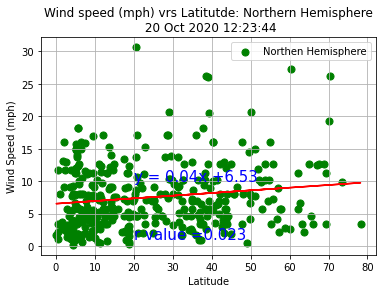

In [75]:
### Wind Speed (mph) vs. Latitude vs. Latitude
###############################################
#Northern Hemisphsere

xN = north_hem_df["Latitude"]
yN = north_hem_df["wind speed (mph)"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Northen Hemisphere",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

  # Plots regresion line
plt.plot(xN,regress_values,"r-")

print("Northern Wind Speed (mph) vs. Latitude")
print(f"Northrn Hemisphere {line_eq}")
print(f"Northern Hemisphere r-value is: {rvalue**2}")

#     THIS NEEDS some attention
plt.annotate(line_eq,(20,10),fontsize=15,color="blue")
r_value = "r value =" + str(round(rvalue**2,4))
plt.annotate(r_value,(20,1),fontsize=15,color="blue")

#########   Formats graph
plt.title(f"Wind speed (mph) vrs Latitutde: Northern Hemisphere\n {time_stamp}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
ax1.legend(loc=1)
ax1.grid(True)

# Save the figure
plt.savefig("output_2/z_02_4a_windspeed_Latitutde_Northern Hemisphere.png")

plt.show()

Southern Wind Speed (mph) vs. Latitude
Southern y = 0.13x +6.9
Southern Hemispher r-value is: 0.0668963974005927


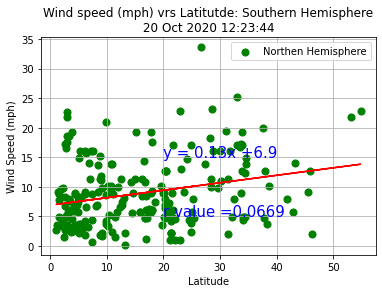

In [76]:
### Wind Speed (mph) vs. Latitude vs. Latitude
###############################################
#Southern Hemisphsere

xN = south_hem_df["Latitude"]
yN = south_hem_df["wind speed (mph)"]

fig, ax1 = plt.subplots()
ax1.scatter(xN, yN, c= "green", s=50, label= "Northen Hemisphere",)

#######    Needed for regression
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xN, yN)

  # Get regression values
regress_values = xN * slope + intercept

  # Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

  # Plots regresion line
plt.plot(xN,regress_values,"r-")

print("Southern Wind Speed (mph) vs. Latitude")
print(f"Southern {line_eq}")
print(f"Southern Hemispher r-value is: {rvalue**2}")

#     THIS NEEDS some attention???????????????????????????????????????
plt.annotate(line_eq,(20,15),fontsize=15,color="blue")
r_value = "r value =" + str(round(rvalue**2,4))
plt.annotate(r_value,(20,5),fontsize=15,color="blue")

#########   Formats graph
plt.title(f"Wind speed (mph) vrs Latitutde: Southern Hemisphere\n {time_stamp} ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# loc =1 puts legend in upper right
ax1.legend(loc=1)
ax1.grid(True)

# Save the figure
plt.savefig("output_2/z_02_4b_WindSPeed_Latitutde_Southern_Hemisphere.png")

plt.show()